# Installing libraries

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import numpy as np

plt.rcParams.update({
'font.size': 11,
'axes.titlesize': 11,
'axes.labelsize': 11,
'xtick.labelsize': 10,
'ytick.labelsize': 10,
'legend.fontsize': 10,
'figure.titlesize': 11,
'figure.dpi' : 200 })

# Nyquist frequency

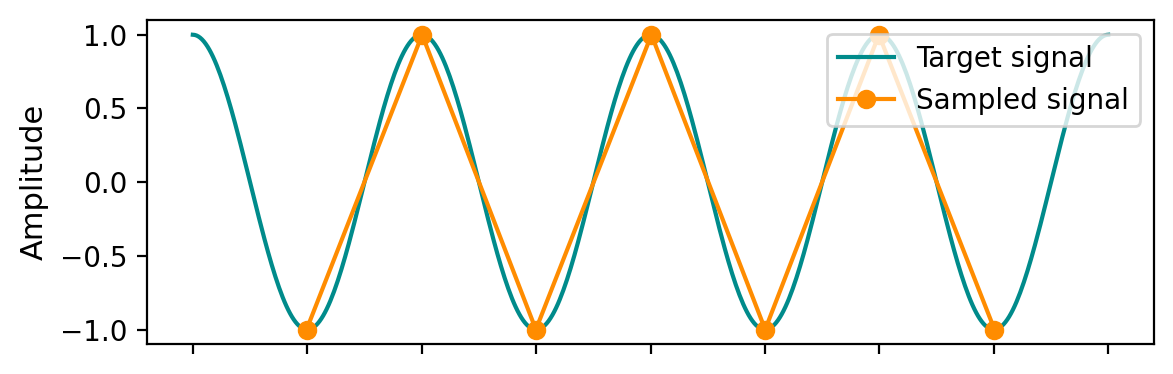

In [8]:
# Create time arrays
t1 = np.linspace(0, 2, 500)  # 2 seconds, 500 samples
t2 = np.linspace(0, 2, 14)  # 2 seconds, 1000 samples
y1 = np.cos(2 * np.pi * 2 * t1)

y2 = np.cos(2 * np.pi * 2 * t2)

fig, ax = plt.subplots(1, 1, figsize=(6, 2))

ax.plot(t1, y1, c='darkcyan',label='Target signal')

# Find the indices of local maxima and minima in the target signal
max_idx = argrelextrema(y1, np.greater)[0]
min_idx = argrelextrema(y1, np.less)[0]
extrema_idx = np.sort(np.concatenate([max_idx, min_idx]))
extrema_t = t1[extrema_idx]
extrema_y = y1[extrema_idx]

ax.plot(extrema_t, extrema_y, '-o',color='darkorange',label='Sampled signal')
ax.set(ylabel='Amplitude',xticklabels=[])
ax.legend(loc='upper right')

fig.tight_layout()
plt.savefig('nyquist_example.png',dpi=300, bbox_inches='tight',pad_inches=0.1)

# Aliasing

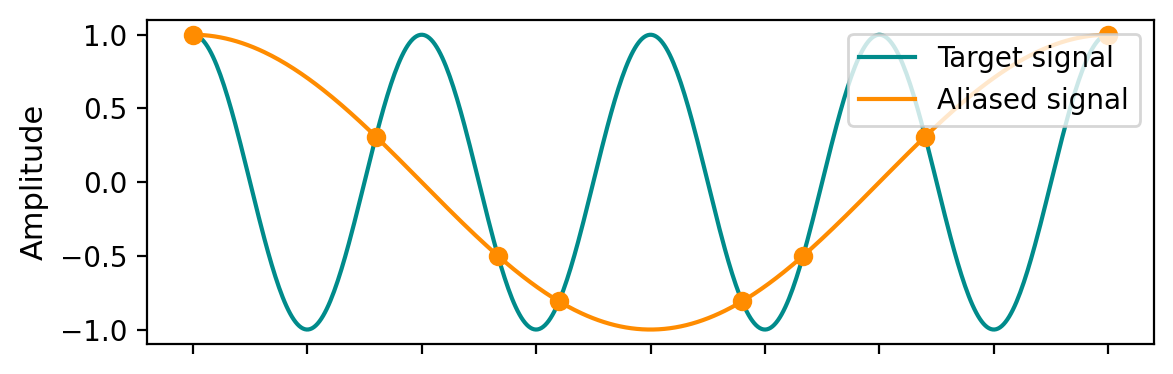

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 2), sharex=True)
ax.plot(t1, y1, c='darkcyan', label='Target signal')
ax.set(ylabel='Amplitude',xticklabels=[])

y2 = np.cos(2 * np.pi * 0.5 * t1)
ax.plot(t1, y2, c='darkorange', label='Aliased signal')

# Find where y1 and y2 cross each other
crossings = np.where(np.diff(np.sign(y1 - y2)))[0]

# Interpolate to get more accurate crossing times
cross_t = t1[crossings] - (y1[crossings] - y2[crossings]) * (t1[1] - t1[0]) / (y1[crossings+1] - y1[crossings] - (y2[crossings+1] - y2[crossings]))
cross_y = y1[crossings] - (y1[crossings] - y2[crossings]) * (y1[crossings+1] - y1[crossings]) / ((y1[crossings+1] - y1[crossings]) - (y2[crossings+1] - y2[crossings]))

ax.plot(cross_t, cross_y, 'o',color='darkorange')

ax.legend(loc='upper right')
fig.tight_layout()
fig.show()
plt.savefig('aliased_signal_example.png',dpi=300, bbox_inches='tight',pad_inches=0.1)

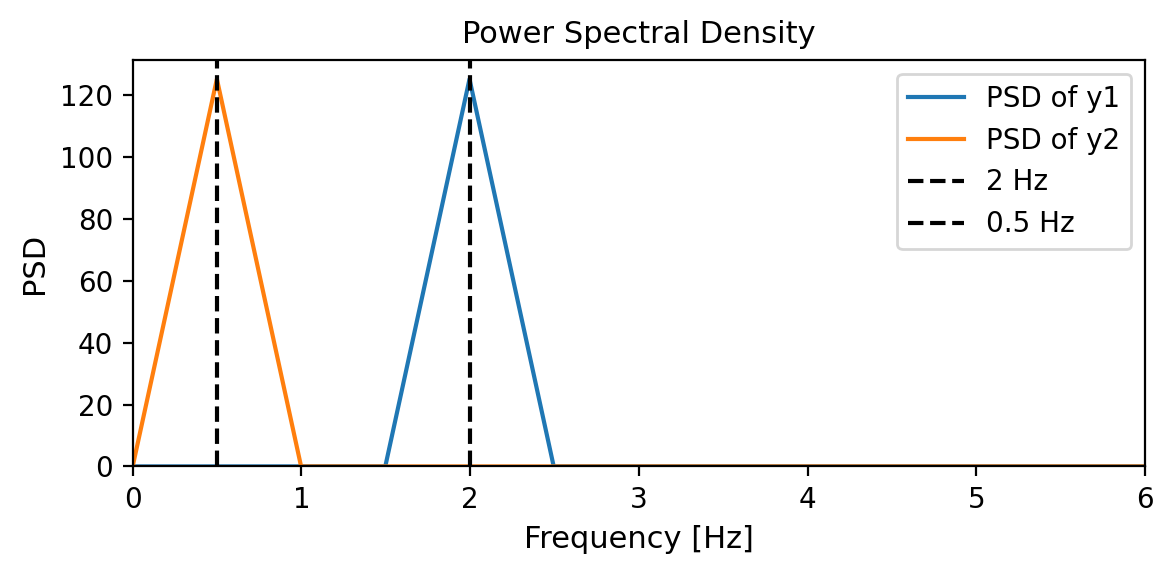

In [55]:
# Compute the Power Spectral Density (PSD) using FFT for y1 and y2
dt = t1[1] - t1[0]  # Sampling interval
fs = 1 / dt         # Sampling frequency

freqs = np.fft.rfftfreq(len(y1), d=dt)
psd_y1 = np.abs(np.fft.rfft(y1))**2 / len(y1)
psd_y2 = np.abs(np.fft.rfft(y2))**2 / len(y2)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(freqs, psd_y1, label='PSD of y1')
ax.plot(freqs, psd_y2, label='PSD of y2')
ax.set(xlabel='Frequency [Hz]', ylabel='PSD', xlim=(0,6),ylim=(0,None),title='Power Spectral Density')
ax.axvline(2, color='k', linestyle='--', label='2 Hz')
ax.axvline(0.5, color='k', linestyle='--', label='0.5 Hz')
ax.legend()
fig.tight_layout()
plt.show()

# Windowing

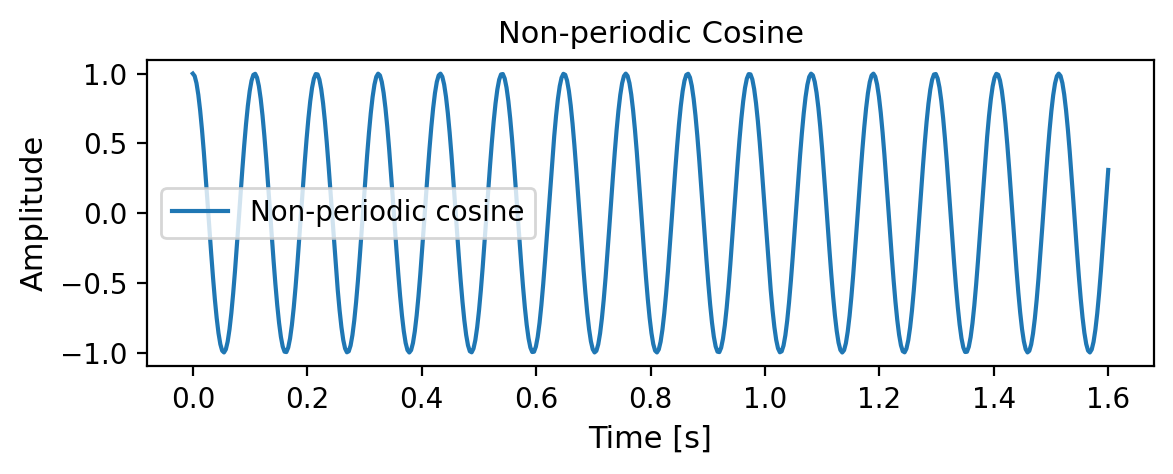

In [17]:
t_non_periodic = np.linspace(0,3.7, 500)  # 2 seconds, 500 samples
y_non_periodic = np.cos(2 * np.pi * 4 * t_non_periodic)
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.plot(t1, y_non_periodic, label='Non-periodic cosine')
ax.set(title='Non-periodic Cosine', xlabel='Time [s]', ylabel='Amplitude')
ax.legend()
fig.tight_layout()
plt.show()

In [26]:
dt = t_non_periodic[1] - t_non_periodic[0]  # Sampling interval
fs = 1 / dt         # Sampling frequency
freqs = np.fft.rfftfreq(len(y_non_periodic), d=dt)
psd_y_non_periodic = np.abs(np.fft.rfft(y_non_periodic*np.hanning(len(y_non_periodic))))**2 / len(y_non_periodic)

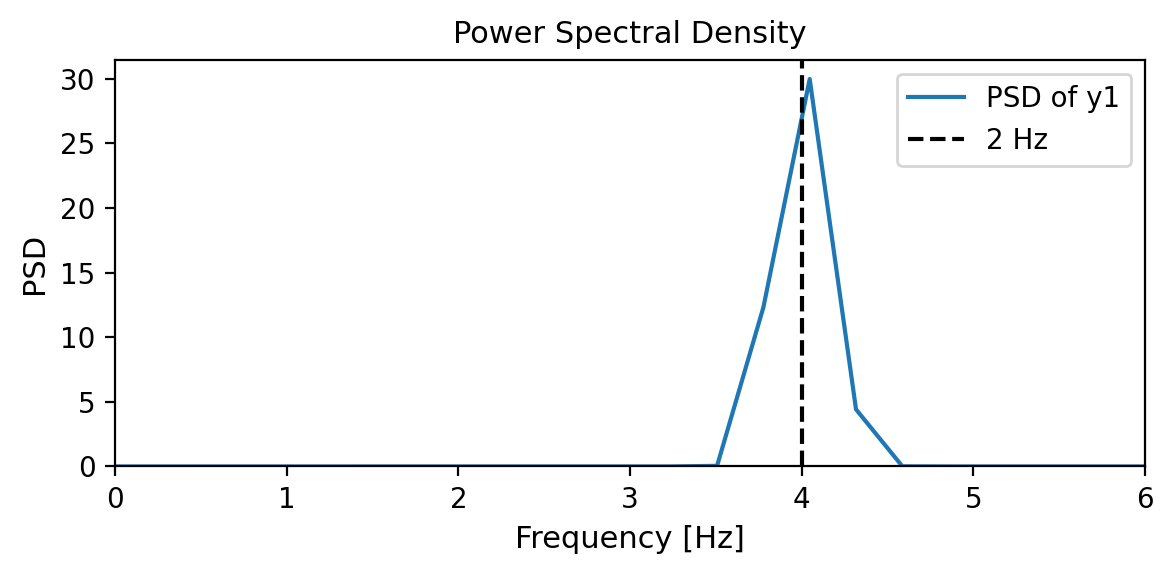

In [27]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(freqs, psd_y_non_periodic, label='PSD of y1')
ax.set(xlabel='Frequency [Hz]', ylabel='PSD', xlim=(0,6),ylim=(0,None),title='Power Spectral Density')
ax.axvline(4, color='k', linestyle='--', label='2 Hz')
ax.legend()
fig.tight_layout()
plt.show()

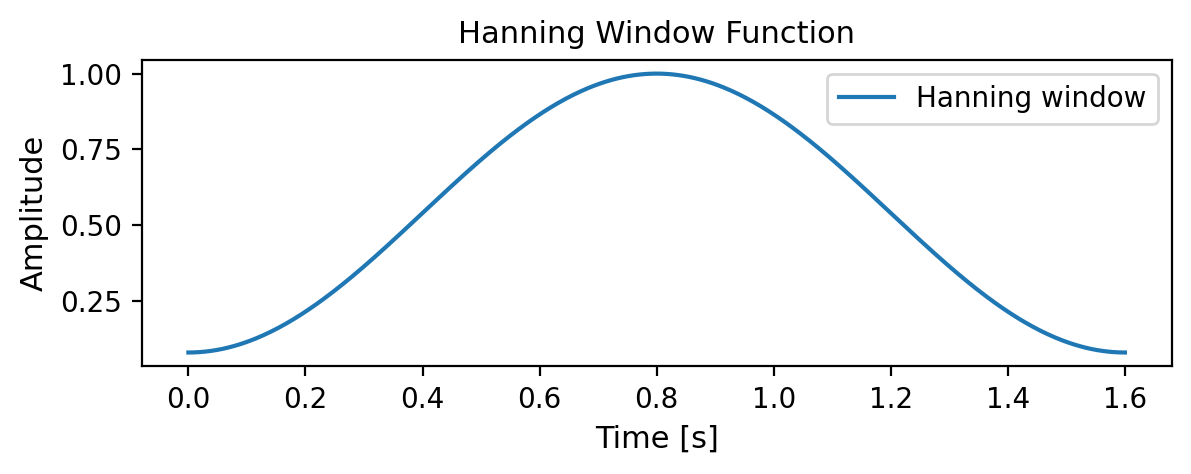

In [21]:
# Plot a Hanning window with the same length as t1
window = np.hamming(len(t1))

fig, ax = plt.subplots(figsize=(6, 2.5))
ax.plot(t1, window, label='Hanning window')
ax.set(title='Hanning Window Function', xlabel='Time [s]', ylabel='Amplitude')
ax.legend()
fig.tight_layout()
plt.show()

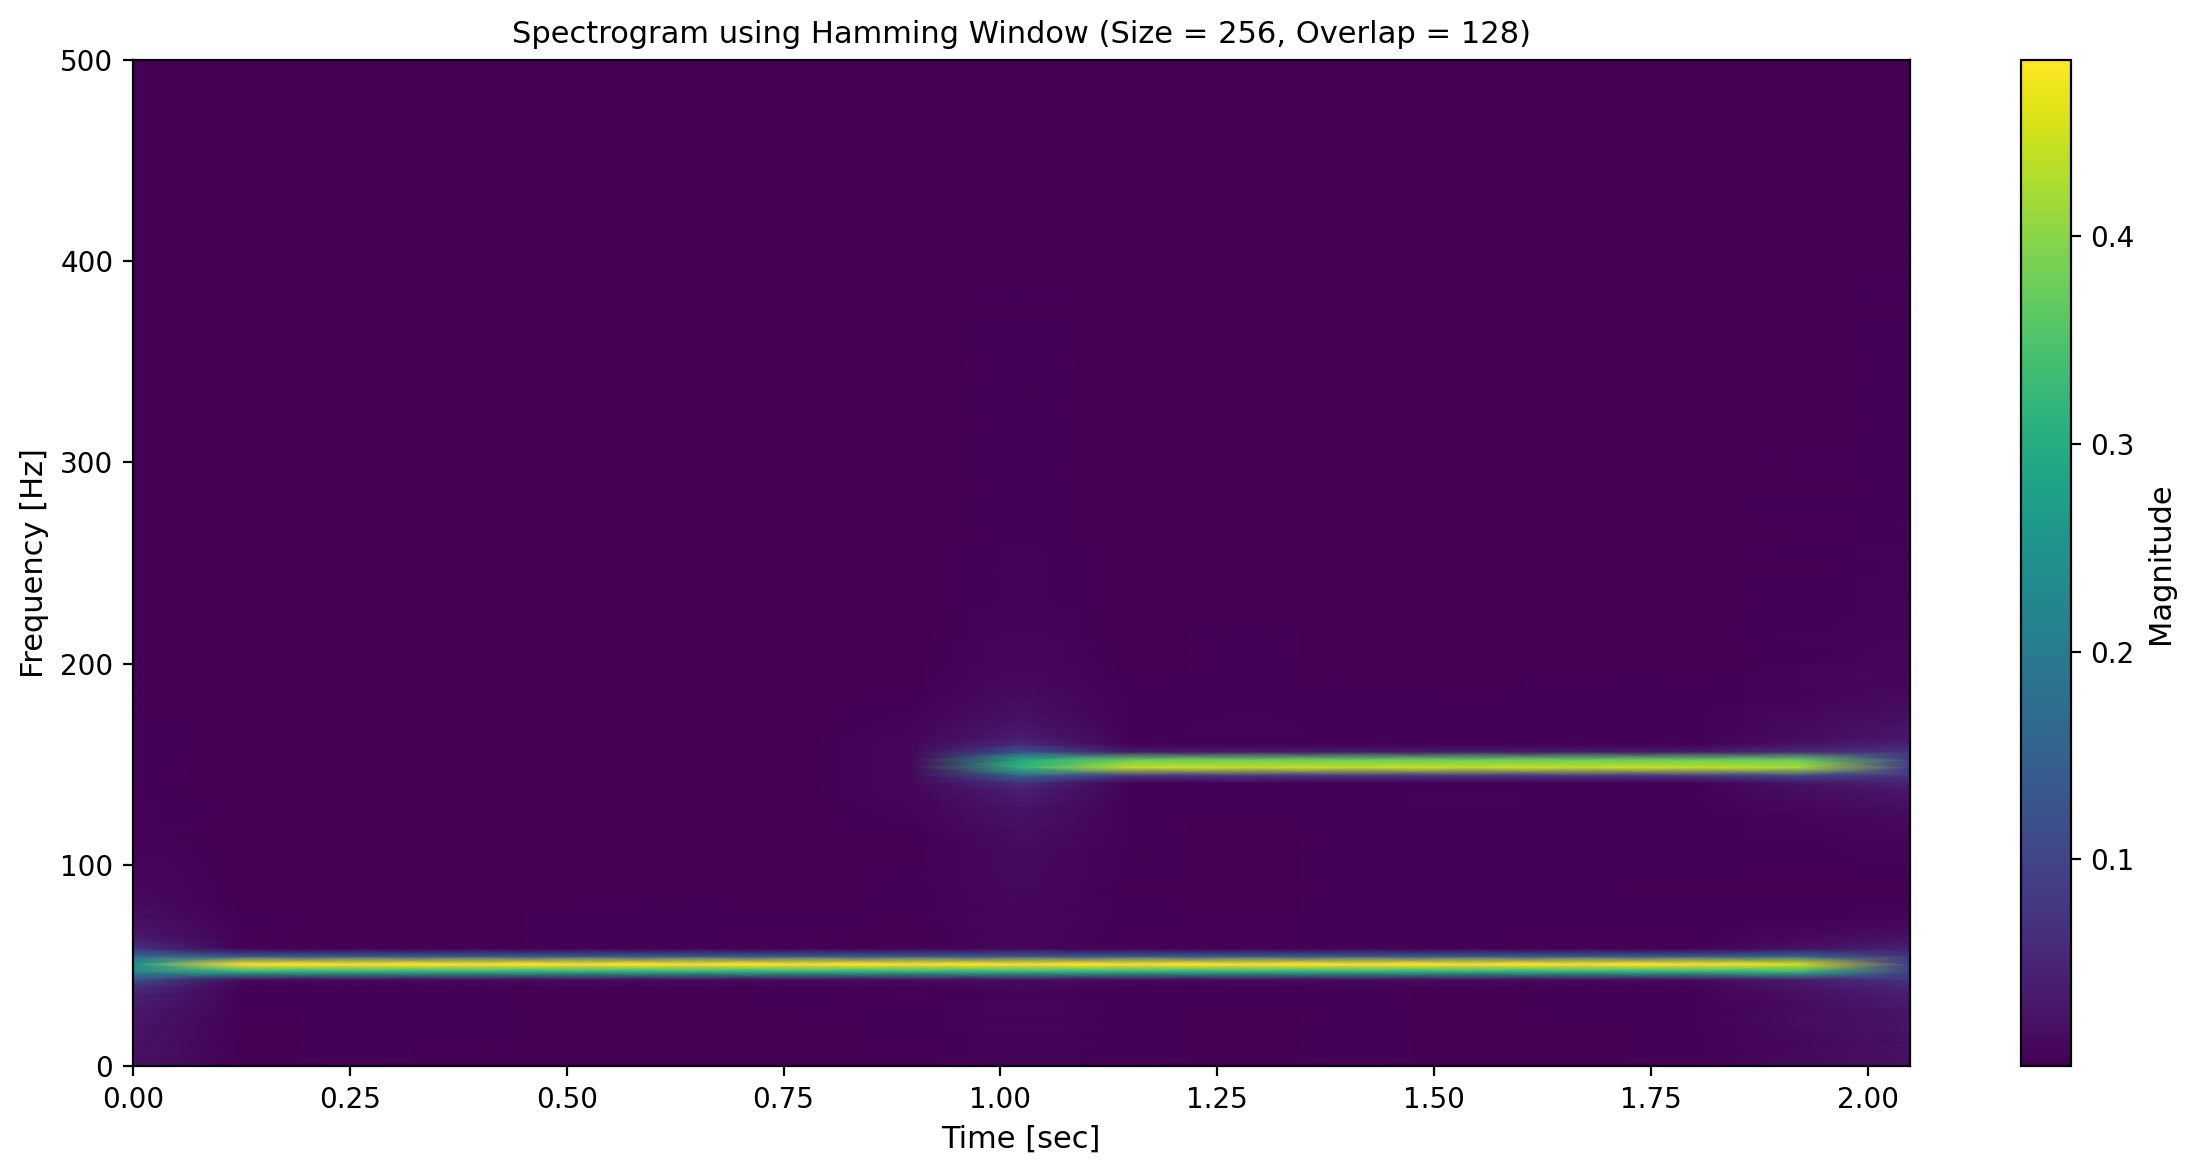

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Generate a test signal: a sine wave that changes frequency over time
fs = 1000  # Sampling frequency in Hz
t = np.linspace(0, 2, 2 * fs, endpoint=False)  # 2 seconds
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 150 * t * (t > 1))

# Apply STFT with a smaller Hamming window
window_size = 256
overlap = 128
window = np.hamming(window_size)

# Perform STFT
f, time, Zxx = stft(signal, fs=fs, window='hamming', nperseg=window_size, noverlap=overlap)

# Plot the spectrogram
plt.figure(figsize=(12, 6))
plt.pcolormesh(time, f, np.abs(Zxx), shading='gouraud')
plt.title('Spectrogram using Hamming Window (Size = 256, Overlap = 128)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()
